In [105]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from functools import partial
#import seaborn as sn
from sklearn.model_selection import train_test_split

from random import seed
seed(1)
seed = 43

import tensorflow as tf
from tensorflow import keras
from tensorflow import image
from tensorflow import core
from tensorflow.keras import layers
print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ",keras.__version__)


kaggle = 0 # Kaggle path active = 1

# change your local path here
if kaggle == 1 :
    MNIST_PATH= '../input/digit-recognizer'
else:
    MNIST_PATH= '../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer'



import os
for dirname, _, filenames in os.walk(MNIST_PATH): 
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

Tensorflow Version:  2.3.0
Keras Version:  2.4.0
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\keras_reg_160_10_002.sav
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\keras_reg_jl_160_10_002.sav
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\sample_submission.csv
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\test.csv
../Digit_Recognition_with_a_Deep_Neural_Network/data/input/digit-recognizer\train.csv


# Introduction - MNIST Training Competition
This notebook is a fork or copy of my previous developed notebook for digit recognition. Therefore you will find some parts that look common to the notebook <a href="https://www.kaggle.com/skiplik/digit-recognition-with-a-deep-neural-network">Digit Recognition with a Deep Neural Network</a> or <a href="https://www.kaggle.com/skiplik/finetuning-hyperparameters-in-deep-neural-network">Finetuning Hyperparameters in Deep Neural Network</a>.

Link to the data topic: https://www.kaggle.com/c/digit-recognizer/data

As in the previous notebooks I will use Tensorflow with Keras. I already mentioned in other notebooks, I will skip some explanations about the data set here. Moreover I will use the already discovered knowledge about the data and transform/prepare the data rightaway.

## Convolutional Neural Networks
My focus on this notebook lies in using Convolutional Neural Networks. I worked with them before but since I read different articles and books about its architecture, I got a deeper understanding of the different layers and their result to the rest of the network. 

As in the previous notebooks I will use different architecture / layer configurations and submit the results to the Kaggle competition to get a rated accuracy value. This will be an indicator for the used model architecture. The plan is to commit the notebook in Git as well as in Kaggle to versionize the architecture with its accuracy value. This will help me to understand the benefits of the different layers a little and look into the progress of the different architectures later.

The idea is to use different layers in different combinations. The following layers will be used in this notebook:

- Convolutional layers (Conv2D, Conv3D,...)
- Max Pooling layers
- Avg Pooling  
- Batch Normalization
- Dropout


Not part of this notebook will be the architecture of Transfer-Learning where a pretrained model is used and retrained with a new dataset. I already tried that approach in the following notebook: https://www.kaggle.com/skiplik/picturerecognition-tf-and-transferlearning-resnet

## Best Runs
The best run was based on Kaggle version 6 with an accuracy of 99.12% on the kaggle competition "Digit Recognizer". For this version the special improvement was (next to the Conv2D layers, the reduction of the epochs for training): https://www.kaggle.com/skiplik/cnn-for-digit-recognition-mnist?scriptVersionId=79696075

Right after that there where an equivalent run with an accuracy of 99.025%. Here happened some architecture changes, added more filters to the Conv-Layers and increased the kernel size. Due to the observation of the training process (via tensorboard) I recognized the validation accuracy starts to get a little bit noisy, therefore I decided to reduce the epochs number to a value where the accuracy still got its none noisy behaviour. In my opinion this is the most important configuration for this accuracy value. The reduction of the epochs just saves the model's capability of giving better answers to totally new, unseen data.

## My other Projects
If you are interested in some more clearly analysis of the dataset take a look into my other notebooks about the MNIS-dataset:
- Finetuning Hyperparameters in Deep Neural Network:
    - https://www.kaggle.com/skiplik/finetuning-hyperparameters-in-deep-neural-network
- Digit Recognition with a Deep Neural Network: 
    - https://www.kaggle.com/skiplik/digit-recognition-with-a-deep-neural-network
- Another MNIST Try:
    - https://www.kaggle.com/skiplik/another-mnist-try
- First NN by Detecting Handwritten Characters:
    - https://www.kaggle.com/skiplik/first-nn-by-detecting-handwritten-characters
...




# Get Data

In [106]:
# Data path and file
CSV_FILE_TRAIN='train.csv'
CSV_FILE_TEST='test.csv'

def load_mnist_data(minist_path, csv_file):
    csv_path = os.path.join(minist_path, csv_file)
    return pd.read_csv(csv_path)

def load_mnist_data_manuel(minist_path, csv_file):
    csv_path = os.path.join(minist_path, csv_file)
    csv_file = open(csv_path, 'r')
    csv_data = csv_file.readlines()
    csv_file.close()
    return csv_data

def split_train_val(data, val_ratio):
    return 
    

train = load_mnist_data(MNIST_PATH,CSV_FILE_TRAIN)
test = load_mnist_data(MNIST_PATH,CSV_FILE_TEST)

In [107]:
y = train['label'].copy()
X = train.drop(['label'], axis=1)

# competition dataset
X_test = test.copy()

## Train / Val Split

In [108]:
print("Shape of the Features: ",X.shape)
print("Shape of the Labels: ", y.shape)

Shape of the Features:  (42000, 784)
Shape of the Labels:  (42000,)


### Label Value Count
Visualizing the label distribution of the full train dataset.

In [109]:
train.value_counts('label')

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
dtype: int64

In [110]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=seed, test_size=0.20
                                                  , stratify=y
                                                 )

Comparing the equally splitted train- and val-sets based on the given label y.

In [111]:
print("Train - Set Distribution")
print(y_train.value_counts() / y_train.value_counts().sum() )
print('--------------------------------------------------------------')
print('--------------------------------------------------------------')
print('--------------------------------------------------------------')
print("Val - Set Distribution")
print(y_val.value_counts() / y_val.value_counts().sum() )


Train - Set Distribution
1    0.111518
7    0.104792
3    0.103601
9    0.099702
2    0.099464
6    0.098512
0    0.098363
4    0.096964
8    0.096726
5    0.090357
Name: label, dtype: float64
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
Val - Set Distribution
1    0.111548
7    0.104762
3    0.103571
9    0.099762
2    0.099405
0    0.098452
6    0.098452
4    0.096905
8    0.096786
5    0.090357
Name: label, dtype: float64


In [112]:
print("X: ", X.shape)
print("X_train: ", X_train.shape)
print("X_val: ", X_val.shape)

print("y_train: ", y_train.shape)
print("y_val: ", y_val.shape)

X:  (42000, 784)
X_train:  (33600, 784)
X_val:  (8400, 784)
y_train:  (33600,)
y_val:  (8400,)


## Building Transforming Piplines

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    #('normalizer', Normalizer())
    ('std_scalar',StandardScaler())
])

## Preprocessing Data

### Data Augmentation with Tensorflow Data Api

In [114]:
def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 85 // 100       # croping to 90% of the initial picture 
    return tf.image.random_crop(image, [min_dim, min_dim, 1])


def crop_flip_resize(image, label, flipping = True):
    if flipping == True:
        cropped_image = random_crop(image)
        cropped_image = tf.image.flip_left_right(cropped_image)
    else:
        cropped_image = random_crop(image)

    ## final solution
    resized_image = tf.image.resize(cropped_image, [28,28])
    final_image = resized_image
    #final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label  
    

In [115]:
X_val.shape

(8400, 784)

In [116]:
# converting dataframe format into tensorflow compatible format.
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.values.reshape(X_val.shape[0], 28, 28, 1)

X_train_crop = X_train.copy()
X_val_crop = X_val.copy()

In [117]:
# Creating tensorbased dataset 

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_train, tf.float32),
            tf.cast(y_train, tf.int32)
        )
    )
)


val_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
             tf.cast(X_val, tf.float32),
             tf.cast(y_val, tf.int32)
        )
    )
)


training_crop_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_train_crop, tf.float32),
            tf.cast(y_train, tf.int32)
        )
    )
)


val_crop_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
             tf.cast(X_val_crop, tf.float32),
             tf.cast(y_val, tf.int32)
        )
    )
)


In [118]:
# resizing, croping images via self build function
training_crop_dataset = training_crop_dataset.map(partial(crop_flip_resize, flipping=False))
val_crop_dataset = val_crop_dataset.map(partial(crop_flip_resize, flipping=False))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


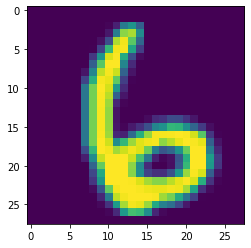

In [119]:
# Visualizing a croped, flipped, resized image from new dataset.
for X_values, y_values in training_crop_dataset.take(1):
    for index in range(1):
        plt.imshow(X_values)

In [120]:
# concate the two datasets
training_dataset_all = training_dataset.concatenate(training_crop_dataset)
val_dataset_all = val_dataset.concatenate(val_crop_dataset)

In [121]:
print("training_dataset_all length: ", len(list(training_dataset_all)))
print("val_dataset_all length: ", len(list(val_dataset_all)))


training_dataset_all length:  67200
val_dataset_all length:  16800


In [122]:
# shuffeling and batching data
tf.random.set_seed(seed)

train_ds = training_dataset_all.shuffle(10000).batch(32).prefetch(1)
val_ds = val_dataset_all.shuffle(8000).batch(32).prefetch(1)

# Building a Deep Neural Network

## Preparing Model Visualization with Tensorboard (not for Kaggle)

In [123]:
root_logdir = "../../tensorboard-logs"

print("Relative root_logdir: ",root_logdir)

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

Relative root_logdir:  ../../tensorboard-logs


In [124]:
run_logdir = get_run_logdir()
print("Current run logdir for Tensorboard: ", run_logdir)

Current run logdir for Tensorboard:  ../../tensorboard-logs\run_2021_11_25-16_28_28


In [125]:
run_logdir

'../../tensorboard-logs\\run_2021_11_25-16_28_28'

### Keras Callbacks for Tensorboard
With Keras there is a way of using Callbacks for the Tensorboard to write log files for the board and visualize the different graphs (loss and val curve)


In [126]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

## Building Model Architecture

In [127]:
from keras.layers import LeakyReLU

input_shape=[784]
input_shape_notFlattened=[28,28,1]

batch_shape = []


learning_rt = 1e-03 
activation_fn = "relu"
initializer = "he_normal"
regularizer =  None

# Model building
def create_model_struc():  
    model = keras.models.Sequential()

    model.add(keras.layers.Conv2D(filters=256, kernel_size=6, strides=2, padding='same', input_shape=input_shape_notFlattened))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation_fn))
    model.add(keras.layers.MaxPooling2D(2))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=2, padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation_fn))
    model.add(keras.layers.MaxPooling2D(2))
    ## 
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=2, padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation_fn))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation="softmax"))

    optimizer = keras.optimizers.Adam(learning_rate=learning_rt)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'] )
    model.build()

    return model   


In [128]:
model = create_model_struc()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 14, 14, 256)       9472      
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
activation_8 (Activation)    (None, 14, 14, 256)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 128)         295040    
_________________________________________________________________
batch_normalization_9 (Batch (None, 4, 4, 128)         512       
_________________________________________________________________
activation_9 (Activation)    (None, 4, 4, 128)        

## Model Checkpoints

In [129]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_train_model.h5", save_best_only=True, save_weights_only=False)

## Model Training

In [130]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[checkpoint_cb, keras.callbacks.EarlyStopping(patience=8), tensorboard_cb])

Epoch 1/10
2100/2100 [==============================] - 64s 31ms/step - loss: 0.1348 - accuracy: 0.9603 - val_loss: 0.1082 - val_accuracy: 0.9673
Epoch 2/10
2100/2100 [==============================] - 65s 31ms/step - loss: 0.0609 - accuracy: 0.9810 - val_loss: 0.0763 - val_accuracy: 0.9756
Epoch 3/10
2100/2100 [==============================] - 66s 31ms/step - loss: 0.0448 - accuracy: 0.9853 - val_loss: 0.0597 - val_accuracy: 0.9837
Epoch 4/10
2100/2100 [==============================] - 65s 31ms/step - loss: 0.0380 - accuracy: 0.9872 - val_loss: 0.0622 - val_accuracy: 0.9817
Epoch 5/10
2100/2100 [==============================] - 64s 30ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0531 - val_accuracy: 0.9836
Epoch 6/10
2100/2100 [==============================] - 64s 30ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0654 - val_accuracy: 0.9807
Epoch 7/10
2100/2100 [==============================] - 63s 30ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0480 -

## Visualizing the Progress

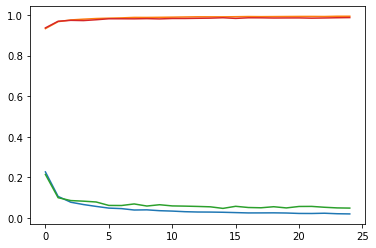

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.show()

### Model Training with Full Dataset 
In this part I will train the model with the full dataset. This time I will use the discovered hyperparameters from previous section.

In [ ]:
model_full = create_model_struc()
model_full.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
activation_5 (Activation)    (None, 7, 7, 128)        

In [ ]:
# creating a new log dir for tensorboard
tensorboard_cb_f = keras.callbacks.TensorBoard(get_run_logdir())
checkpoint_cb_f = keras.callbacks.ModelCheckpoint("my_modell_full.h5", save_best_only=False, save_weights_only=False)

In [ ]:
# preparing full features set (X) for the tensorflow data api

training_dataset_all = training_dataset.concatenate(training_crop_dataset)
val_dataset_all = val_dataset.concatenate(val_crop_dataset)

training_ds_all = training_dataset_all.concatenate(val_dataset_all)

training_ds_all = training_ds_all.shuffle(20000).batch(32).prefetch(1)

In [107]:
# Train the model again pleeeeease with all you got .... especially the new transformed data matrix X 
history_full = model_full.fit(training_ds_all, epochs=11, callbacks=[tensorboard_cb_f, checkpoint_cb_f])

NameError: name 'model_full' is not defined

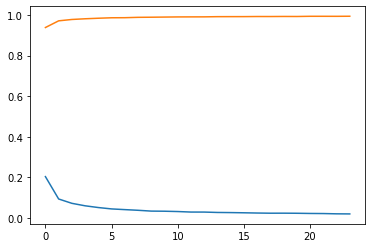

In [37]:
plt.plot(pd.DataFrame(history_full.history))
plt.show()

# Image Prediction of Unknown Data (Test Data)

## Peparing Test Data
As well as previously done, we need to create a TF dataset of the test set as well.

In [38]:
# converting dataframe format into tensorflow compatible format.
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)


test_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_test, tf.float32)
        )
    )
)

In [39]:
test_dataset

<TensorSliceDataset shapes: (28, 28, 1), types: tf.float32>

In [40]:
test_ds = test_dataset.batch(32).prefetch(1)

## Creating Competition File

In [41]:
mnist_competition_file = pd.DataFrame(columns=['ImageId','Label'])

## Prediction of Testdata

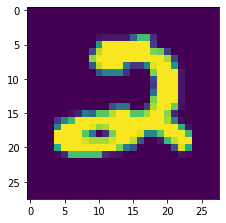

In [42]:
# Visualizing the image
plt.figure(figsize=(12, 12))
for X_batch in test_ds.take(1):
    for index in range(1):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index])

plt.show()

In [43]:
for element in test_ds.take(1):
    print("Propability of all lables for given pixels: ", model_full.predict(test_ds.take(1))[0])

Propability of all lables for given pixels:  [1.0828646e-13 1.4674600e-16 1.0000000e+00 2.5054231e-10 3.0301879e-09
 1.2468671e-12 9.9274750e-17 1.4983346e-11 3.9261570e-14 2.2130670e-13]


In [44]:
print("Predicted Digit: ",np.argmax(model_full.predict(test_ds.take(1))[0]))

Predicted Digit:  2


In [45]:
predictions = model_full.predict(test_ds)                                                                           # predict the probability
predictions = np.argmax(predictions, axis=1)                                                                        # getting the predicted digit numbers based ont the probability of every np element 
mnist_competition_file = pd.DataFrame(predictions)                                                                  # converting into df
mnist_competition_file.index += 1                                                                                   # index should start at 1
mnist_competition_file.reset_index(level=0, inplace=True)                                                           # make the index a column 
mnist_competition_file = mnist_competition_file.rename(columns={"index": "ImageId", 0: "Label"}, errors="raise")    # renamen them according to the competition requirements

In [46]:
mnist_competition_file

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [47]:
mnist_competition_file.ImageId = mnist_competition_file.ImageId.astype(int)
mnist_competition_file.Label = mnist_competition_file.Label.astype(int)

In [48]:
mnist_competition_file.to_csv('mnist_submission.csv', index=False)